# Nouhayla MOUAKKAL 

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Linear Regression : Nouhayla Mouakkal

In [126]:
dataset = pd.read_csv('DBS.csv', delimiter=';')
dataset.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [127]:
X = dataset.result_points
y = dataset.project
print(X.shape)
print(y.shape)

(261,)
(261,)


In [128]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(261, 1)
(261, 1)


In [129]:
dataset.isnull().sum()

access           0
tests            0
tests_grade      0
exam             0
project          0
project_grade    0
assignments      0
result_points    0
result_grade     0
graduate         0
year             0
acad_year        0
dtype: int64

# Data Splitting : Nouhayla MOUAKKAL

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(208, 1)
(208, 1)
(53, 1)
(53, 1)


In [131]:
# Add bias term (column of ones) to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [132]:
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [133]:
np.random.seed(0)
theta = np.random.randn(2, 1)
print('Theta:', theta)

Theta: [[1.76405235]
 [0.40015721]]


# Modèle linéaire : Nouhayla Mouakkal

In [134]:
def model(X, theta):
    return X.dot(theta)

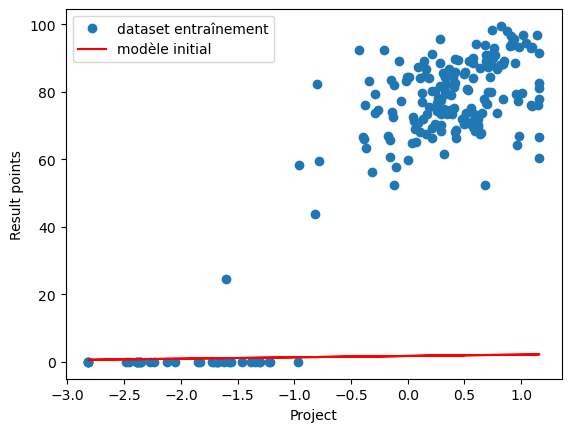

In [135]:
plt.plot(X_train[:, 1], y_train, 'o', label='dataset entraînement')
plt.plot(X_train[:, 1], model(X_train, theta), c='r', label='modèle initial')
plt.xlabel('Project')
plt.ylabel('Result points')
plt.legend()
plt.show()

# Cost Function : Nouhayla Mouakkal

In [136]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [137]:
cost_function(X_train, y_train, theta)


2479.981535145609

# D.G : Nouhayla 

In [138]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [139]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [140]:
n_iterations = 200
learning_rate = 0.1

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


In [141]:
cost_history

array([2026.33816053, 1658.88702708, 1361.251609  , 1120.16692035,
        924.88832254,  766.71265831,  638.59037029,  534.811317  ,
        450.75028382,  382.66084696,  327.50840309,  282.83492356,
        246.64940514,  217.33913523,  193.59781659,  174.3673485 ,
        158.79066934,  146.17355922,  135.95370003,  127.67561408,
        120.97036446,  115.53911227,  111.139798  ,  107.57635344,
        104.68996334,  102.35198737,  100.45822683,   98.92428079,
         97.6817845 ,   96.6753625 ,   95.86016068,   95.19984721,
         94.6649933 ,   94.23176163,   93.88084398,   93.59660068,
         93.36636361,   93.17987158,   93.02881304,   92.90645562,
         92.80734611,   92.72706741,   92.66204166,   92.6093708 ,
         92.56670741,   92.53215006,   92.50415861,   92.48148553,
         92.46312034,   92.44824453,   92.43619513,   92.42643511,
         92.4185295 ,   92.41212595,   92.40693908,   92.40273771,
         92.39933461,   92.39657809,   92.39434531,   92.39253

In [142]:
theta_final

array([[65.14600957],
       [27.9305206 ]])

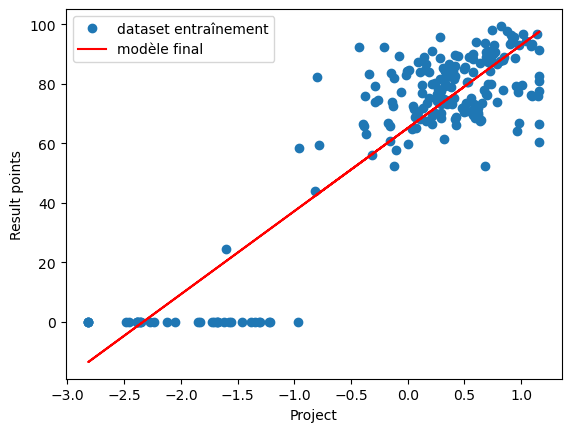

In [143]:
plt.plot(X_train[:, 1], y_train, 'o', label='dataset entraînement')
plt.plot(X_train[:, 1], model(X_train, theta_final), c='r', label='modèle final')
plt.xlabel('Project')
plt.ylabel('Result points')
plt.legend()
plt.show()

# Courbe d'apprentissage

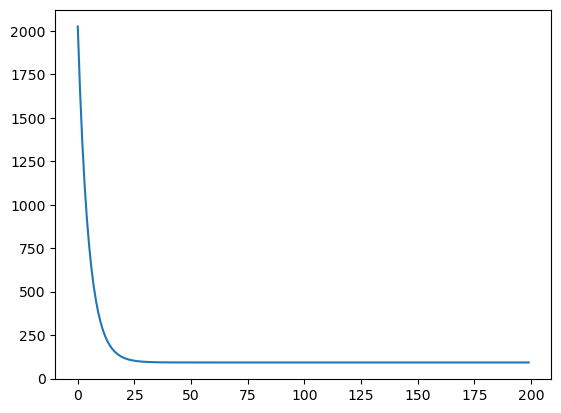

In [144]:
# nouhayla
plt.plot(range(n_iterations), cost_history)
plt.show()

In [145]:
y_pred = model(X_test, theta_final)


In [146]:
# nouhayla 
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [147]:
r_squared = coef_determination(y_test, y_pred)
print(f'Coefficient of Determination on the testset: {r_squared}')


Coefficient of Determination on the testset: 0.7545730117485226
